In [ ]:
%pip install torch transformers bertviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 56.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 55.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 30.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 82.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.5/157.5 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

# Токенізація та Ембедінги


Токенізація — це процес розбиття тексту на частини, які називаються токенами.
Ці токени — це те, з чим працює модель. Вони можуть бути:

    словами ("I", "love", "cats")

    частинами слів ("play", "##ing")

    символами ("!", "?")

Важче слово:

    sentence = "unbelievable"

    tokens = ["un", "##bel", "##iev", "##able"]

BERT використовує WordPiece токенізацію, яка розбиває рідкісні слова на частини:

    "##" означає, що частина продовжує слово

    Це дозволяє моделі працювати навіть з незнайомими словам

Token ID — це індекс в словнику (vocabulary) моделі

In [ ]:
from transformers import BertTokenizer, BertModel
import torch

# Загружаємо токенізатор та модель BERT
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertModel.from_pretrained("bert-base-uncased")

In [ ]:
# Вхідне речення
sentence = "I love bananas"

# Токенізуємо речення
inputs = tokenizer(sentence, return_tensors="pt")
print("Tokens:", tokenizer.convert_ids_to_tokens(inputs["input_ids"][0]))

# Отримуємо ембедінги
with torch.no_grad():
    outputs = model(**inputs)
    embeddings = outputs.last_hidden_state


Tokens: ['[CLS]', 'i', 'love', 'bananas', '[SEP]']


In [ ]:
# Print shape and example embedding
print("Embeddings shape:", embeddings.shape)
print("Embeddings :", embeddings)
print("Embeddings shape for 'love':", embeddings[0][2].shape)
print("Embedding for 'love':", embeddings[0][2])

# 1 — це розмір батчу (ми передали одне речення)

# 5 — кількість токенів у реченні (включно зі спеціальними токенами [CLS], [SEP])

# Токени: ['[CLS]', 'i', 'love', 'bananas', '[SEP]'] → 5 токенів

# 768 — розмірність векторного представлення кожного токена.
# Це означає, що кожен токен перетворюється на вектор з 768 чисел — саме цей вектор і є embedding.

Embeddings shape: torch.Size([1, 5, 768])
Embeddings : tensor([[[ 0.0675,  0.2505,  0.0174,  ..., -0.1658,  0.0384,  0.1029],
         [ 0.2579,  0.3636,  0.3231,  ..., -0.3932,  0.6545,  0.3476],
         [ 0.7192,  0.8088,  0.7118,  ..., -0.4766,  0.3865, -0.1987],
         [-0.6230, -0.2548, -0.1624,  ...,  0.6292,  0.3212, -0.1734],
         [ 0.7557,  0.2926, -0.0603,  ..., -0.3744, -0.7639, -0.2705]]])
Embeddings shape for 'love': torch.Size([768])
Embedding for 'love': tensor([ 7.1925e-01,  8.0877e-01,  7.1178e-01, -2.5055e-01,  7.7660e-01,
         4.2272e-01, -2.0231e-01,  4.5741e-01, -6.4435e-01, -4.9356e-01,
        -9.2040e-01, -5.0623e-01, -5.0380e-01,  5.2244e-01,  3.4020e-02,
         5.4535e-01,  1.6835e-01,  1.4038e-03,  2.9807e-01,  3.8859e-02,
        -2.0494e-01, -1.2847e-01, -8.0422e-01,  3.8779e-01, -1.4333e-01,
         4.3954e-02, -3.1603e-01, -3.0479e-01,  2.4866e-02, -3.4464e-01,
         3.2971e-01,  3.7967e-01,  4.6115e-02,  1.9563e-01, -6.3394e-01,
        

**Математика ембедінгів**

"king"   - "man"   + "woman"  ≈  "queen"

[0.8,...] - [0.4,...] + [0.5,...] ≈ [0.9,...]


##Контекстуальні ембедінги

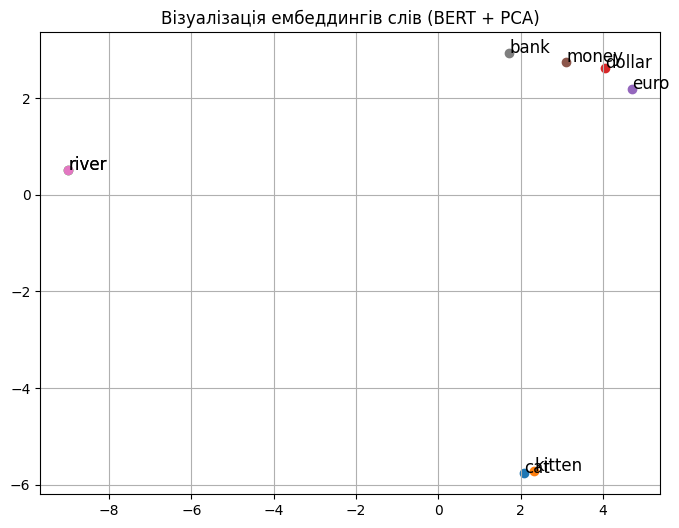

In [ ]:
from transformers import BertTokenizer, BertModel
import torch
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Слова для порівняння
words = ["cat","kitten","river","dollar","euro","money","bank"]

# Завантаження моделі
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertModel.from_pretrained("bert-base-uncased")
model.eval()

embeddings = []

# Отримання ембеддингу для кожного слова
with torch.no_grad():
    for word in words:
        inputs = tokenizer(word, return_tensors="pt")
        outputs = model(**inputs)
        # Беремо ембеддинг першого реального токена (пропускаємо [CLS])
        embed = outputs.last_hidden_state[0][1]  # [0][1] — перший batch, другий токен
        embeddings.append(embed.numpy())

# Зменшення розмірності до 2D
pca = PCA(n_components=2)
reduced = pca.fit_transform(embeddings)

# Візуалізація
plt.figure(figsize=(8, 6))
for i, word in enumerate(words):
    x, y = reduced[i]
    plt.scatter(x, y)
    plt.text(x + 0.01, y + 0.01, word, fontsize=12)

plt.title("Візуалізація ембеддингів слів (BERT + PCA)")
plt.grid(True)
plt.show()


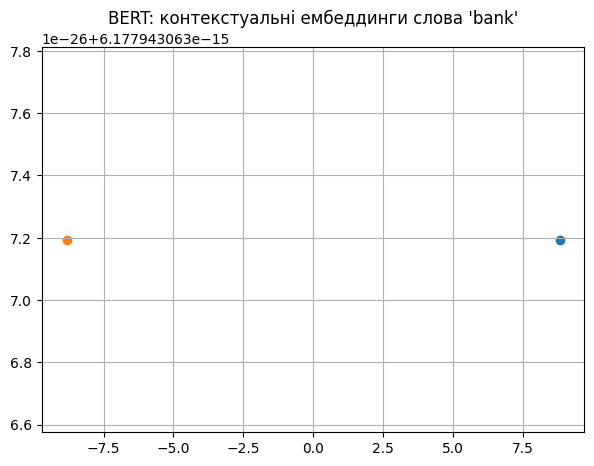

In [ ]:
from transformers import BertTokenizer, BertModel
import torch

tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertModel.from_pretrained("bert-base-uncased")
model.eval()

sentences = [
    "I deposited cash at the bank",
    "We sat on the bank of the river"
]

vectors = []
labels = []

with torch.no_grad():
    for sent in sentences:
        inputs = tokenizer(sent, return_tensors="pt")
        outputs = model(**inputs)
        tokens = tokenizer.convert_ids_to_tokens(inputs["input_ids"][0])
        idx = tokens.index("bank")
        embed = outputs.last_hidden_state[0][idx]
        vectors.append(embed.numpy())
        labels.append(sent)

# Зменшуємо до 2D
pca = PCA(n_components=2)
reduced = pca.fit_transform(vectors)

# Візуалізуємо
plt.figure(figsize=(7, 5))
for i, label in enumerate(labels):
    x, y = reduced[i]
    plt.scatter(x, y)
    plt.text(x + 0.01, y + 0.01, f"bank ({label})", fontsize=9)
plt.title("BERT: контекстуальні ембеддинги слова 'bank'")
plt.grid(True)
plt.show()


##Статичні ембедінги

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

--2025-07-03 16:00:37--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2025-07-03 16:00:38--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2025-07-03 16:00:39--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [ ]:
import numpy as np

def load_glove_embeddings(file_path="glove.6B.300d.txt"):
    embeddings = {}
    with open(file_path, "r", encoding="utf8") as f:
        for line in f:
            values = line.split()
            word = values[0]
            vec = np.asarray(values[1:], dtype='float32')
            embeddings[word] = vec
    return embeddings

glove = load_glove_embeddings("glove.6B.300d.txt")


/usr/local/lib/python3.11/dist-packages/sklearn/decomposition/_pca.py:648: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var


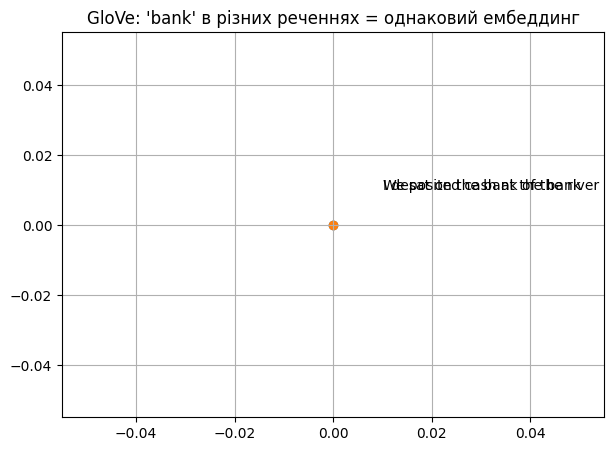

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


# "bank" в обох реченнях — беремо той самий вектор
glove_bank_vector = glove["bank"]
vectors = [glove_bank_vector, glove_bank_vector]
labels = [
    "I deposited cash at the bank",
    "We sat on the bank of the river"
]

# Зменшуємо до 2D
pca = PCA(n_components=2)
reduced = pca.fit_transform(vectors)

# Візуалізуємо
plt.figure(figsize=(7, 5))
for i, label in enumerate(labels):
    x, y = reduced[i]
    plt.scatter(x, y)
    plt.text(x + 0.01, y + 0.01, label, fontsize=10)
plt.title("GloVe: 'bank' в різних реченнях = однаковий ембеддинг")
plt.grid(True)
plt.show()


# Positional Encoding

In [ ]:
import torch
import torch.nn as nn

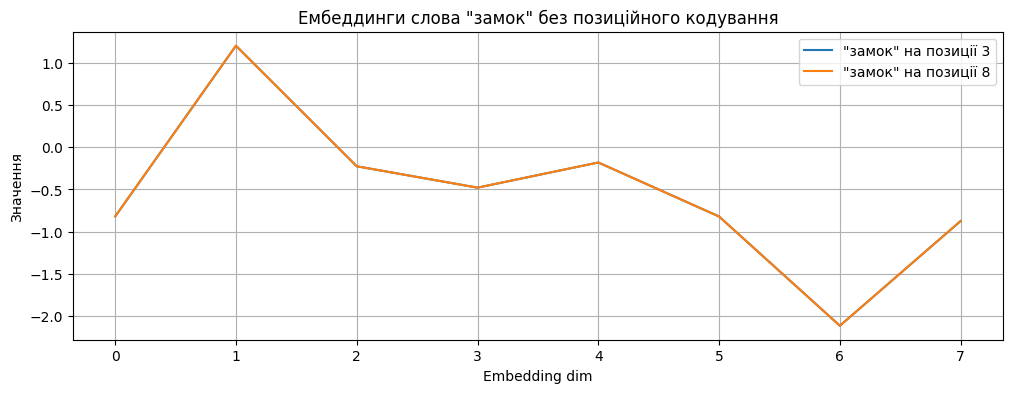

In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# === Речення без positional encoding ===
tokens = ["я", "пішов", "в", "замок", "і", "побачив", "на", "дверях", "замок"]
vocab = {w: i for i, w in enumerate(set(tokens))}
ids = torch.tensor([vocab[w] for w in tokens])
d_model = 8  # розмір ембеддингу

# === Тільки словникові ембеддинги ===
embed = nn.Embedding(len(vocab), d_model)
x = embed(ids).unsqueeze(0)  # (1, seq_len, d_model)

# позиції слова "замок" у реченні
zamok_idx = [i for i, w in enumerate(tokens) if w == "замок"]

# === Візуалізація: два «замок» без позиційного кодування ===
plt.figure(figsize=(12, 4))
for i in zamok_idx:
    plt.plot(x[0, i].detach().numpy(), label=f'"замок" на позиції {i}')
plt.title('Ембеддинги слова "замок" без позиційного кодування')
plt.xlabel("Embedding dim")
plt.ylabel("Значення")
plt.legend()
plt.grid()
plt.show()


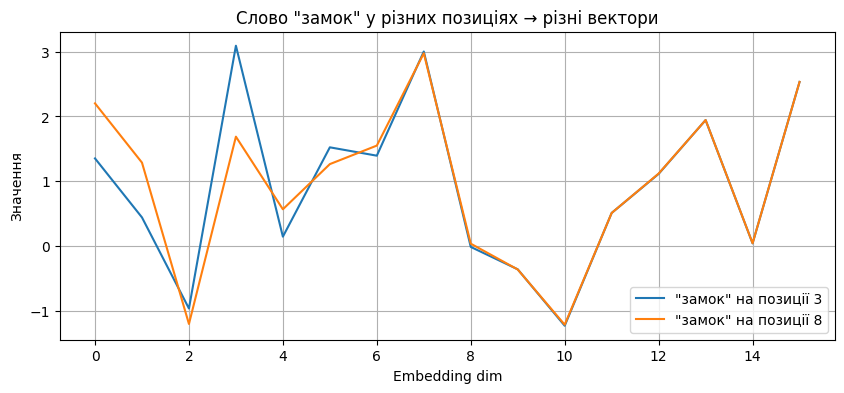

In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# === Речення ===
tokens = ["я", "пішов", "в", "замок", "і", "побачив", "на", "дверях", "замок"]

# === Словник: кожне слово має унікальний ID ===
vocab = {w: i for i, w in enumerate(set(tokens))}
ids = torch.tensor([vocab[w] for w in tokens])  # перетворюємо речення на індекси
d_model = 16  # невеликий розмір ембеддингу

# === Ембеддинги ===
embed = nn.Embedding(num_embeddings=len(vocab), embedding_dim=d_model)
x = embed(ids).unsqueeze(0)  # (1, seq_len, d_model)

# === Positional Encoding ===
class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=50, device='cpu'):
        super().__init__()
        pe = torch.zeros(max_len, d_model, device=device)
        pos = torch.arange(0, max_len).float().unsqueeze(1)
        _2i = torch.arange(0, d_model, 2).float()
        pe[:, 0::2] = torch.sin(pos / (10000 ** (_2i / d_model)))
        pe[:, 1::2] = torch.cos(pos / (10000 ** (_2i / d_model)))
        self.encoding = pe.unsqueeze(0)

    def forward(self, x):
        return x + self.encoding[:, :x.size(1), :]

pe = PositionalEncoding(d_model=d_model)
x_pe = pe(x)

# === Знайдемо позиції слова "замок" ===
zamok_idx = [i for i, w in enumerate(tokens) if w == "замок"]

# === Візуалізація: замок на різних позиціях
plt.figure(figsize=(10, 4))
for i in zamok_idx:
    plt.plot(x_pe[0, i].detach().numpy(), label=f'"замок" на позиції {i}')
plt.title('Слово "замок" у різних позиціях → різні вектори')
plt.xlabel("Embedding dim")
plt.ylabel("Значення")
plt.legend()
plt.grid()
plt.show()


# Encoder

## Self-Attention

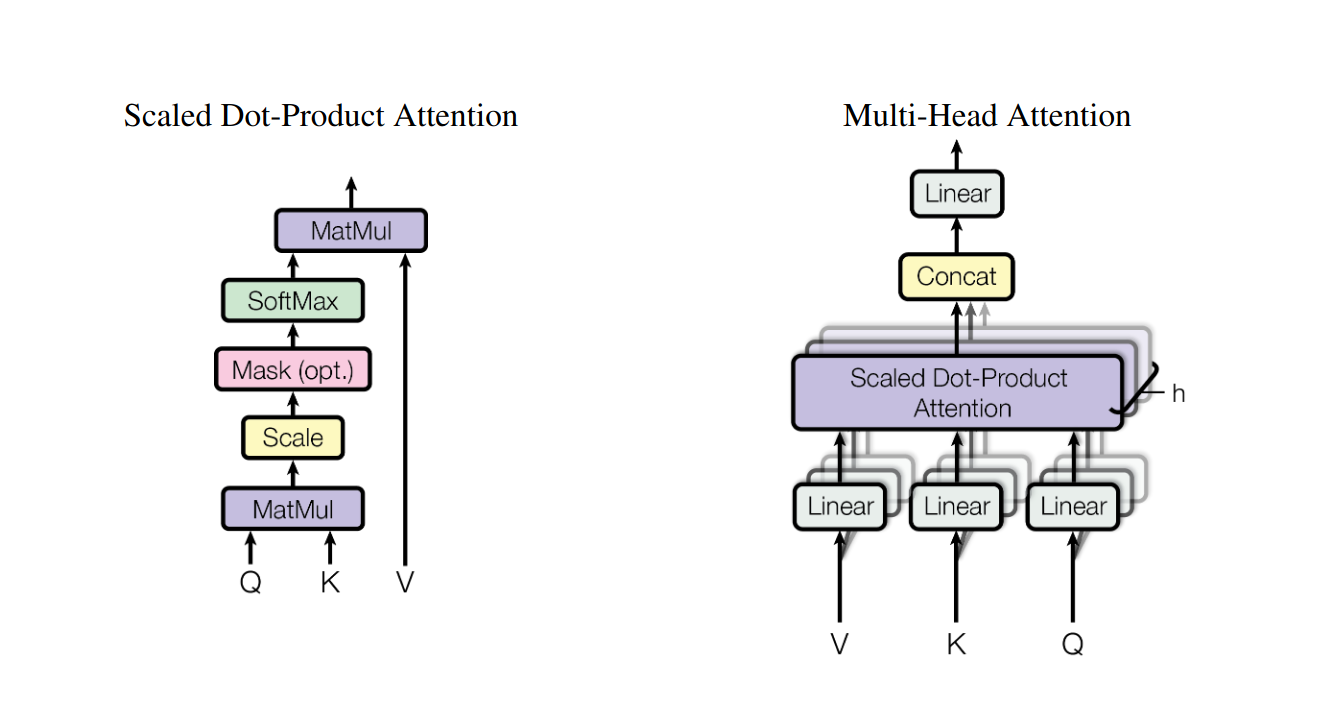

**Що таке Key, Value,Query**

Query - запит потосного слова

Key - це паспорт кожного іншого слова, який описує, про що воно

Value — це інформація, яку слово готове передати, якщо виявиться корисним.

Q = X @ W_q

K = X @ W_k

V = X @ W_v

Розмір матриць W_q, W_k, W_v залежить від розмірів ембедінгів слова

**Уявіть, шо ви готуєте борщ**

**Query:** "Шукаю інгредієнти для борщу"

На ринку стоять продавці, і кожен з них

    має свою табличку (**Key**) — це те, що він продає;

    і має продукт (**Value**) — це, власне, товар, який він дасть тобі.

Твоє завдання — порівняти свій запит із кожною табличкою (query + key), і вирішити, наскільки цінним є товар для твого рецепта.

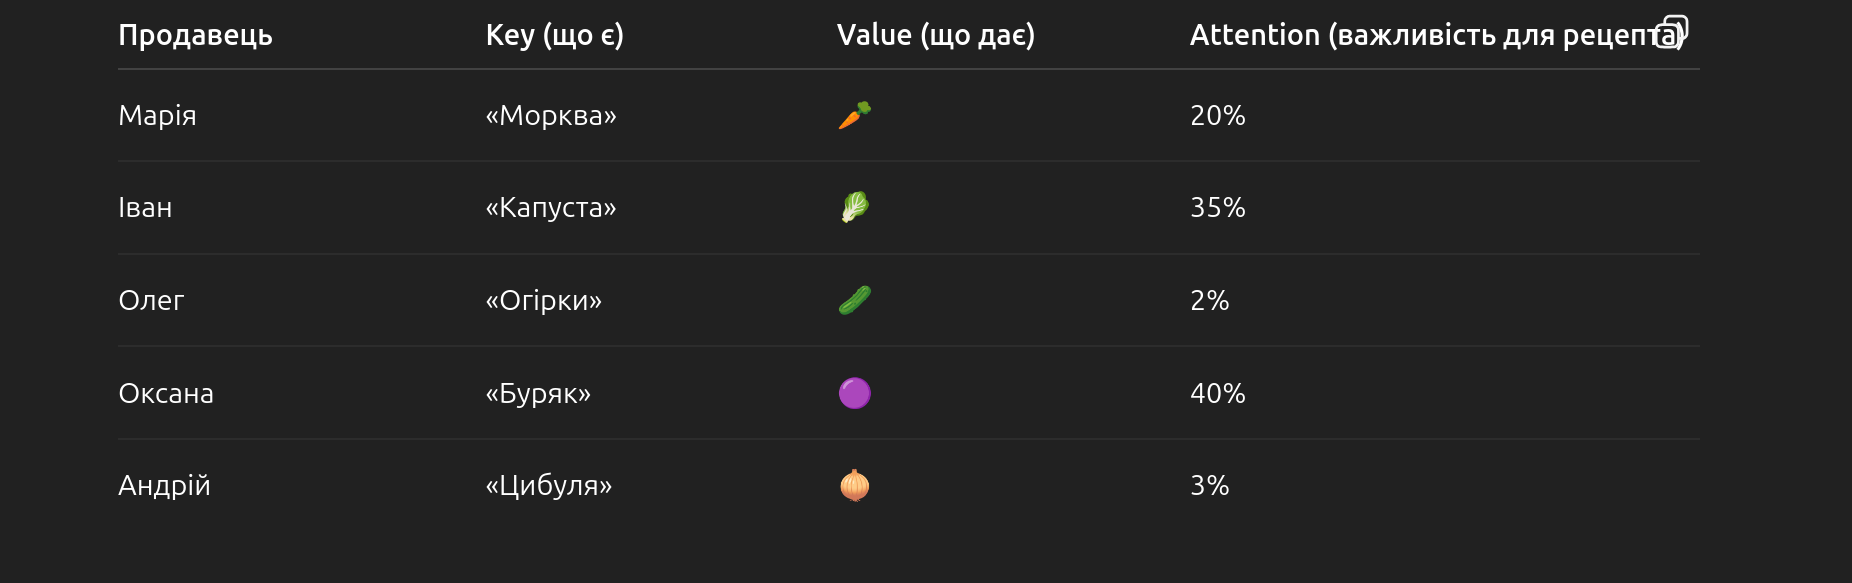

**Dot Product у Self-Attention?**

Уяви, що кожне слово після перетворення у вектори має два вектори:

    Query — чого шукає слово?

    Key — яку «ознаку» має інше слово?

Щоб дізнатися, наскільки добре інше слово відповідає запиту, ми робимо dot product (скалярний добуток) між цими векторами:

score = Query • Key = q₁·k₁ + q₂·k₂ + ... + qₙ·kₙ

Чим більше значення — тим схожіші ці два вектори → отже, більше уваги (attention) це слово отримає.


In [ ]:
import torch
from transformers import BertTokenizer, BertModel
import math, numpy as np

# ------------------------------------------------------------------
# 1) Обираємо речення з омонімом "bank" (два різні значення):
#    - перший "bank"  → фінансова установа
#    - другий  "bank" → берег річки
# ------------------------------------------------------------------
sent = "He went to the bank and sat by the bank of the river."

# ------------------------------------------------------------------
# 2) Завантажуємо мульти-мовний BERT-токенізатор і модель
# ------------------------------------------------------------------
mdl  = "bert-base-uncased"
tok  = BertTokenizer.from_pretrained(mdl)
model = BertModel.from_pretrained(mdl)

# ------------------------------------------------------------------
# 3) Токенізуємо текст  → отримаємо ідентифікатори та список токенів
# ------------------------------------------------------------------
inp  = tok(sent, return_tensors="pt")
seq  = tok.convert_ids_to_tokens(inp['input_ids'][0])
print("Tokens:", seq)           #  BERT дробить речення

# ------------------------------------------------------------------
# 4) Беремо ПЕРШИЙ шар (layer 0) та саму self-attention
#    Щоб вручну обчислити Q, K, V, ваги уваги й фінальний output
# ------------------------------------------------------------------
att_block = model.encoder.layer[0].attention.self

with torch.no_grad():
    h = model.embeddings(input_ids=inp['input_ids'])   # (1, seq_len, d_model)
    Q = att_block.query(h)     # запити  (Query)
    K = att_block.key(h)       # ключі    (Key)
    V = att_block.value(h)     # значення (Value)

# ------------------------------------------------------------------
# 5) Формула self-attention: weights = softmax(QKᵀ / √d_k)
# ------------------------------------------------------------------
d_k = Q.size(-1)
scores  = torch.matmul(Q, K.transpose(-2, -1)) / math.sqrt(d_k)  # сирі "схожості"
weights = scores.softmax(dim=-1)                                 # нормовані ваги
out     = torch.matmul(weights, V)                               # нові вектори токенів

# ------------------------------------------------------------------
# 6) Знаходимо позиції обох "bank" у списку токенів
# ------------------------------------------------------------------
bank_pos = [i for i, t in enumerate(seq) if t == "bank"]
idx1, idx2 = bank_pos[0], bank_pos[1]    # перший і другий "bank"

def first10(tensor, idx):
    """Повертає перші 10 компонент вектора (для компактного друку)"""
    return np.round(tensor.squeeze(0)[idx][:10].cpu().numpy(), 4)

# ------------------------------------------------------------------
# 7) Д друкуємо для КОЖНОГО "bank":
#    • Q і K (перші 10 чисел)  – щоб показати 'запит' і 'ключ'
#    • Attention weights       – на кого слово дивиться (рядок матриці уваги)
#    • Output (перші 10 чисел) – новий контекстуальний вектор
# ------------------------------------------------------------------
print(f"\nToken: '{seq[idx1]}' at position {idx1} (financial BANK)")
print("Q[0:10] =", first10(Q, idx1))
print("K[0:10] =", first10(K, idx1))
print("Attention weights ->", np.round(weights[0, idx1].cpu().numpy(), 2))
print("Output[0:10] =", first10(out, idx1))

print(f"\nToken: '{seq[idx2]}' at position {idx2} (river BANK)")
print("Q[0:10] =", first10(Q, idx2))
print("K[0:10] =", first10(K, idx2))
print("Attention weights ->", np.round(weights[0, idx2].cpu().numpy(), 2))
print("Output[0:10] =", first10(out, idx2))

# ------------------------------------------------------------------
#    різні ваги attention для двох 'bank'  → різний контекст
#    різні контекстуальні вихідні вектори  → BERT розрізняє значення
# ------------------------------------------------------------------


Tokens: ['[CLS]', 'he', 'went', 'to', 'the', 'bank', 'and', 'sat', 'by', 'the', 'bank', 'of', 'the', 'river', '.', '[SEP]']

Token: 'bank' at position 5 (financial BANK)
Q[0:10] = [ 0.5901 -0.6439 -1.1914  1.1092 -2.0642 -0.1641  0.611  -0.2227  0.3391
 -0.0574]
K[0:10] = [-0.7665  1.2541 -0.3467  0.1001 -1.1683 -0.3148  0.099   0.2389 -0.2653
  0.2343]
Attention weights -> [0.13 0.01 0.19 0.02 0.07 0.36 0.03 0.03 0.02 0.   0.02 0.   0.   0.11
 0.   0.02]
Output[0:10] = [ 0.1836 -0.4309  0.2012  0.1607  0.1502  0.2073  0.1207  0.0479 -0.1709
  0.0988]

Token: 'bank' at position 10 (river BANK)
Q[0:10] = [ 0.8706 -0.5111 -1.2812  1.2257 -1.7215 -0.2275  0.398   0.0219  0.2588
 -0.1224]
K[0:10] = [-0.7985  1.2743 -0.332  -0.0873 -1.2402 -0.0833  0.1881  0.0338 -0.2108
  0.368 ]
Attention weights -> [0.06 0.   0.01 0.   0.   0.01 0.   0.01 0.05 0.03 0.15 0.03 0.01 0.62
 0.   0.01]
Output[0:10] = [ 0.0679 -0.8668  0.0208  0.2054 -0.5227  0.3303  0.5354 -0.3174 -0.4459
 -0.2777]


In [ ]:
from transformers import BertTokenizer, BertModel
from bertviz import head_view
import torch

# === Підготовка тексту ===
sentence = "She left her phone on the left side of the room."
model_name = "bert-base-multilingual-cased"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertModel.from_pretrained(model_name, output_attentions=True)

inputs = tokenizer(sentence, return_tensors='pt')
outputs = model(**inputs)

# === Attention з усіх голов ===
attention = outputs.attentions  # список: 12 шарів attention

# === Візуалізація (інтерактивна) ===
tokens = tokenizer.convert_ids_to_tokens(inputs['input_ids'][0])
head_view(attention, tokens)


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]

BertSdpaSelfAttention is used but `torch.nn.functional.scaled_dot_product_attention` does not support non-absolute `position_embedding_type` or `output_attentions=True` or `head_mask`. Falling back to the manual attention implementation, but specifying the manual implementation will be required from Transformers version v5.0.0 onwards. This warning can be removed using the argument `attn_implementation="eager"` when loading the model.


<IPython.core.display.Javascript object>

**ADD & Norm Layer**
1. Add = Резідуальний зв'язок

    Ми додаємо вхідне значення шару до вихідного
2. Norm = Layer Normalization

    Після додавання — ми нормалізуємо результат.

**FNN**

Після того, як self-attention або cross-attention завершилися і дані пройшли через Add & Norm, кожен токен окремо передається у просту двошарову нейронну мережу

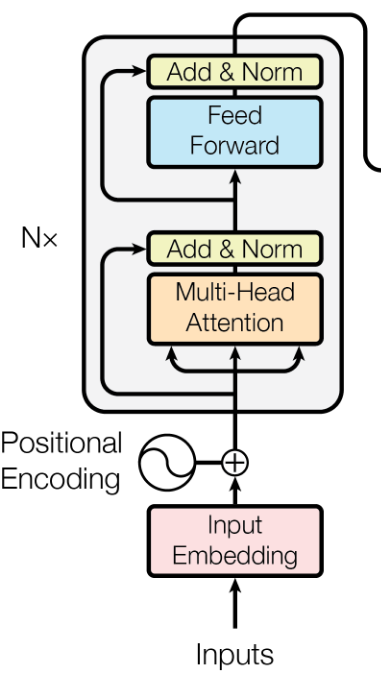

Input x

(матриця векторів слів після embedding + positional encoding)

↓

Self-Attention

Кожне слов намагається зрозуміти своє значення, та вибудувати зв'язок з іншими словами.Будується контекст.

↓

Add & Norm

(Add = додаємо результат попереднього шару до його вхідного значення
→ це називається residual connection (резідуальний зв’язок)

Norm = нормалізуємо результат
конкретно — Layer Normalization (приблизно як batchnorm, але по-іншому))

↓

Feed-Forward NN

↓

Add & Norm

↓

Output

вектори вже контекстуалізовані, бо кожне слово осмислило себе, подивившись на інші.

# Decoder

**Що подається на вхід декодеру під час навчання?**

Вхід у декодер:

    Модель бачить правильні попередні слова
    — але тільки ті, що вже мають бути згенеровані на попередніх кроках

Наприклад:

Правильне речення:

    The cat sat on the mat

Вхід у декодер (inputs):

    The cat sat on the

Модель має передбачити:

    mat

Але!  Всі позиції мають бачити тільки попередні токени, а не наступні  тому і потрібна маска.


In [ ]:
import torch
import torch.nn.functional as F

# === Вхідні токени (4 слова)
tokens = ["I", "love", "pizza", "!"]
seq_len = len(tokens)
d_model = 4

# === Випадкові вектори (ембеддинги)
torch.manual_seed(42)
x = torch.randn(seq_len, d_model)

# === Q та K – як у звичайній Self-Attention
Q = x @ torch.randn(d_model, d_model)
K = x @ torch.randn(d_model, d_model)
scores = Q @ K.T / d_model**0.5

print("Raw attention scores:")
print(torch.round(scores, decimals=2))

# === Маска: нижній трикутник
mask = torch.tril(torch.ones(seq_len, seq_len))

print("\nMask (Lower Triangular):")
print(mask)

# === Маскуємо майбутнє
masked_scores = scores.masked_fill(mask == 0, float('-inf'))
weights = F.softmax(masked_scores, dim=-1)

print("\nMasked attention weights (після softmax):")
print(torch.round(weights, decimals=2))


Raw attention scores:
tensor([[-3.8500,  2.2400,  2.7800,  2.8200],
        [-1.6000, -1.7500,  8.7100,  1.2000],
        [-0.1000, -0.9900, -5.6500, -0.7600],
        [ 2.3100, -1.1500, -1.0400, -1.5800]])

Mask (Lower Triangular):
tensor([[1., 0., 0., 0.],
        [1., 1., 0., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 1.]])

Masked attention weights (після softmax):
tensor([[1.0000, 0.0000, 0.0000, 0.0000],
        [0.5400, 0.4600, 0.0000, 0.0000],
        [0.7100, 0.2900, 0.0000, 0.0000],
        [0.9200, 0.0300, 0.0300, 0.0200]])


| Крок | Вхід (`decoder_input`)         | Вихід (`target`) |
| ---- | ------------------------------ | ---------------- |
| 1    | `[BOS]`                        | `"The"`          |
| 2    | `[BOS] The`                    | `"cat"`          |
| 3    | `[BOS] The cat`                | `"sat"`          |
| 4    | `[BOS] The cat sat`            | `"on"`           |
| 5    | `[BOS] The cat sat on`         | `"the"`          |
| 6    | `[BOS] The cat sat on the`     | `"mat"`          |
| 7    | `[BOS] The cat sat on the mat` | `[EOS]`          |


## Cross-attention

Якщо модель просто пише текст з голови -> достатньо тільки self-attention

Але якщо вона має відповісти на щось, перекласти, резюмувати —
вона повинна дивитися на вхід

І це ми робимо через Cross-Attention —
модель бере запит -> кодує його ->
і під час відповіді "дивиться назад" на запит, щоб дати осмислену відповідь.

| Задача                       | Input                    | Output                  |
| ---------------------------- | ------------------------ | ----------------------- |
| **Машинний переклад**        | "I love cats"            | "Я люблю котів"         |
| **Резюмування**              | Великий текст            | Короткий текст (резюме) |
| **Q\&A (питання–відповідь)** | Питання + контекст       | Відповідь               |
| **Image captioning**         | Картинка (вектори з CNN) | Текстовий опис          |
| **Speech-to-text**           | Аудіо                    | Текст                   |


Input y (часткове речення → "I love ...")

↓

Masked Self-Attention     

 дивиться лише на попередні токени

↓

Add & Norm

↓

Encoder–Decoder Attention  

дивиться на вхідне речення

↓

Add & Norm

↓

Feed-Forward Neural Network

↓

Add & Norm

↓

Output y'